In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# folder path into a string 
path = r'C:\\Users\\Jalon\\Desktop\\python_projects'


In [4]:
#importing citibike df
df = pd.read_csv(os.path.join(path,'citibike_last.csv'))

In [5]:
df.shape

(43019, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43019 entries, 0 to 43018
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               43019 non-null  int64  
 1   trip_id                  43019 non-null  object 
 2   weekday                  43019 non-null  int64  
 3   start_hour               43019 non-null  int64  
 4   start_time               43019 non-null  object 
 5   start_station_id         43019 non-null  int64  
 6   start_station_latitude   43019 non-null  float64
 7   start_station_longitude  43019 non-null  float64
 8   end_time                 43019 non-null  object 
 9   end_station_id           43019 non-null  int64  
 10  end_station_latitude     43019 non-null  float64
 11  end_station_longitude    43019 non-null  float64
 12  trip_duration            43019 non-null  int64  
 13  subscriber               43019 non-null  object 
 14  birth_year            

In [7]:
df.head()

,Unnamed: 0,trip_id,weekday,start_hour,start_time,start_station_id,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,duration_flag,age,age_flag
0,0,LnQzQk,1,18,2013-09-09 18:18:55,523,40.754666,-73.991382,2013-09-09 18:35:28,334,40.742388,-73.997262,993,Subscriber,1968.0,2,average_dur,45.0,average
1,1,IL9boN,4,18,2013-09-12 18:38:53,257,40.719392,-74.002472,2013-09-12 18:48:34,236,40.728419,-73.987140,581,Subscriber,1983.0,1,average_dur,30.0,average
2,2,46clGB,3,19,2013-09-18 19:44:04,479,40.760193,-73.991255,2013-09-18 19:50:05,513,40.768254,-73.988639,361,Subscriber,1989.0,1,short_dur,24.0,young
3,3,v7vdFt,6,11,2013-09-28 11:54:37,527,40.743156,-73.974347,2013-09-28 12:03:58,441,40.756014,-73.967416,561,Subscriber,1988.0,2,average_dur,25.0,young
4,4,HbKJBz,5,22,2013-09-27 22:01:01,293,40.730287,-73.990765,2013-09-27 22:08:08,432,40.726218,-73.983799,427,Subscriber,1986.0,2,average_dur,27.0,young


In [8]:
del(df["Unnamed: 0"])

In [9]:
df.columns

Index(['trip_id', 'weekday', 'start_hour', 'start_time', 'start_station_id',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_station_id', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'duration_flag',
       'age', 'age_flag'],
      dtype='object')

In [10]:
#keeping ony lthe columns i am intrested in and that are numerical
df1 = df[[ 'trip_duration', 'age']]

In [11]:
#reshaping the values in trip duration and age columns
for x in df1.columns:
    df1[x].values.reshape(-1,1)

## QN3
Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-11792284310.591013,
 -3836471573.295535,
 -1871158577.6477962,
 -1092827086.031356,
 -710138895.4798633,
 -492922387.5987834,
 -362337243.9232251,
 -279662796.2801086,
 -221904135.54165316]

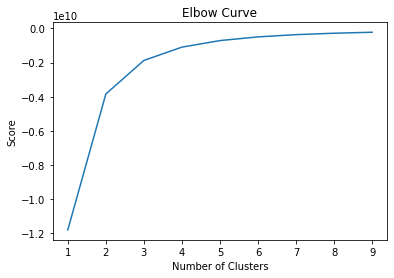

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## QN4
Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

**from the number of cluster 1 until the number of cluster 4 we can see a fast decrease in the Score number 
which indicates the rate of variation for each cluster option. Therefore i am chosing the cluster number 4.



## QN5
Run the k-means algorithm.


In [15]:
# Create the k-means object
kmeans = KMeans(n_clusters = 4, n_jobs = -1) 


In [16]:
# Fit the k-means object to the data.

kmeans.fit(df1)

C:\Users\Jalon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [17]:
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\Jalon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Jalon\AppData\Local\Temp/ipykernel_14544/865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [18]:
df1.head()

,trip_duration,age,clusters
0,993,45.0,0
1,581,30.0,0
2,361,24.0,3
3,561,25.0,3
4,427,27.0,3


In [19]:
df1["clusters"].value_counts()

3    19478
0    13892
2     7013
1     2636
Name: clusters, dtype: int64

In [20]:
#tring to compare it with my manual clustering by age from previous exercise.
df["age_flag"].value_counts()

average    22771
young      10324
old         9883
v_old         41
Name: age_flag, dtype: int64

## QN6
Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [21]:
#adding the clusters column to my df
df_new = pd.concat([df, df1["clusters"]], axis=1)

In [25]:
df_new

,trip_id,weekday,start_hour,start_time,start_station_id,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,duration_flag,age,age_flag,clusters
0,LnQzQk,1,18,2013-09-09 18:18:55,523,40.754666,-73.991382,2013-09-09 18:35:28,334,40.742388,-73.997262,993,Subscriber,1968.0,2,average_dur,45.0,average,0
1,IL9boN,4,18,2013-09-12 18:38:53,257,40.719392,-74.002472,2013-09-12 18:48:34,236,40.728419,-73.987140,581,Subscriber,1983.0,1,average_dur,30.0,average,0
2,46clGB,3,19,2013-09-18 19:44:04,479,40.760193,-73.991255,2013-09-18 19:50:05,513,40.768254,-73.988639,361,Subscriber,1989.0,1,short_dur,24.0,young,3
3,v7vdFt,6,11,2013-09-28 11:54:37,527,40.743156,-73.974347,2013-09-28 12:03:58,441,40.756014,-73.967416,561,Subscriber,1988.0,2,average_dur,25.0,young,3
4,HbKJBz,5,22,2013-09-27 22:01:01,293,40.730287,-73.990765,2013-09-27 22:08:08,432,40.726218,-73.983799,427,Subscriber,1986.0,2,average_dur,27.0,young,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43014,Ayusua,6,15,2013-09-28 15:30:14,435,40.741740,-73.994156,2013-09-28 15:46:29,448,40.756604,-73.997901,975,Subscriber,1973.0,1,average_dur,40.0,average,0
43015,xrF3KL,0,16,2013-09-01 16:27:11,224,40.711464,-74.005524,2013-09-01 16:52:52,301,40.722174,-73.983688,1541,Subscriber,1975.0,1,long_dur,38.0,average,2
43016,XGB7JU,6,17,2013-09-14 17:32:26,261,40.694749,-73.983625,2013-09-14 17:52:17,151,40.721816,-73.997203,1191,Subscriber,1970.0,2,long_dur,43.0,average,2
43017,vFs2HS,6,18,2013-09-07 18:08:21,402,40.740343,-73.989551,2013-09-07 18:25:51,524,40.755273,-73.983169,1050,Subscriber,1961.0,2,long_dur,52.0,old,0


In [27]:
df_new.to_excel('df_last.xlsx', index=False)

In [26]:
df_new.to_csv('df_new.csv', index=False)

## QN7
Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

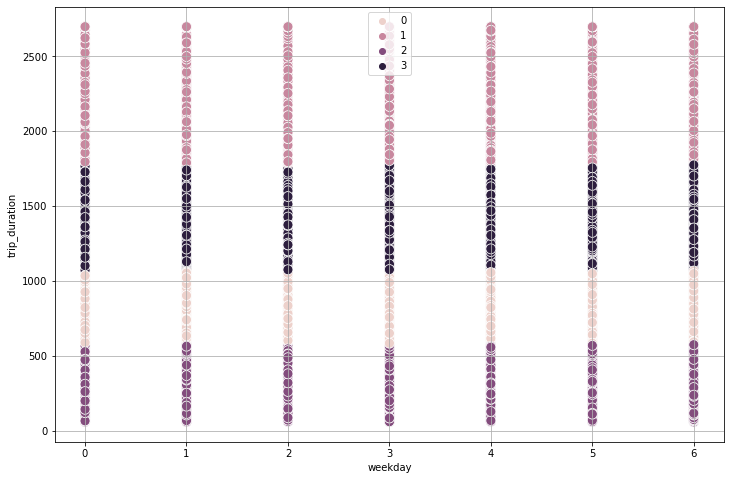

In [22]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['weekday'], y=df_new['trip_duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True) # This removes the grid from the background.
plt.xlabel('weekday') # Label x-axis.
plt.ylabel('trip_duration') # Label y-axis.
plt.show()

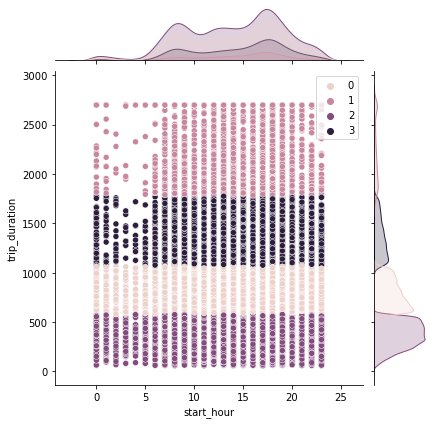

In [23]:
# jointplot to see relationship between trip duration and age
sns.jointplot(x='start_hour',y='trip_duration', hue =kmeans.labels_ ,data=df)

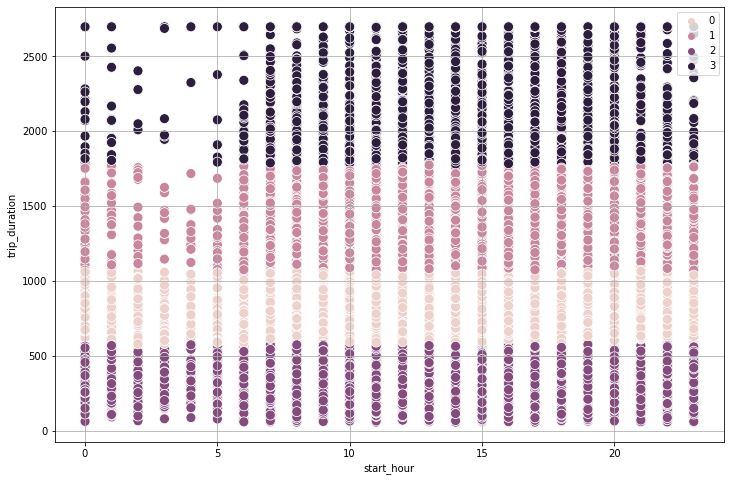

In [92]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['start_hour'], y=df_new['trip_duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True) # This removes the grid from the background.
plt.xlabel('start_hour') # Label x-axis.
plt.ylabel('trip_duration') # Label y-axis.
plt.show()

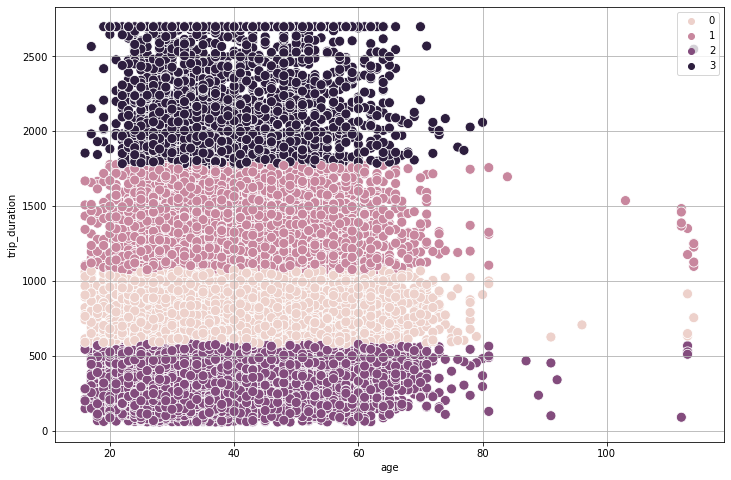

In [93]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['age'], y=df_new['trip_duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True) # This removes the grid from the background.
plt.xlabel('age') # Label x-axis.
plt.ylabel('trip_duration') # Label y-axis.
plt.show()

## QN8
Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
Note down your thoughts in a markdown cell.


The clusters makes sense, but since k-means doesnt consider categorical data. the clustering with k-means didnt add much information, comparing to the clustering made manually. Maybe the clustering with k-means is more accurate and exact than the manual clustering. In this case it is clear, that the algorithm clustered Groups depending on the range of the trip duration.


The clustering with k means only considered the age and trip duration columns. There are several other Machine Learning algorithm and every time new ones are created, maybe another algorithm, that consider both categorical and numeric could be more informativ.


## QN9
Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.


In [25]:
df_new.loc[df_new['clusters'] == 3, 'cluster'] = 'dark_purple'
df_new.loc[df_new['clusters'] == 2, 'cluster'] = 'purple'
df_new.loc[df_new['clusters'] == 1, 'cluster'] = 'prink'
df_new.loc[df_new['clusters'] == 0, 'cluster'] = 'yellow'

In [26]:
df_new.columns

Index(['trip_id', 'weekday', 'start_hour', 'start_time', 'start_station_id',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_station_id', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'duration_flag',
       'age', 'age_flag', 'clusters', 'cluster'],
      dtype='object')

In [27]:
df_new.groupby('cluster').agg({'age':['mean', 'median','max','min'],
                               
                               
                         })

age                    
                  mean median    max   min
cluster                                   
dark_purple  37.988673   36.0  114.0  16.0
prink        38.606487   36.0  114.0  16.0
purple       36.963079   35.0  113.0  16.0
yellow       37.417456   35.0  114.0  16.0

As we can see the clustering didn't add much information all four groups has almost the same mean, median, max and min
This means that this model didnt add much information as already anticipated

## QN10
Propose what these results could be useful for in future steps of an analytics pipeline.

As the results were not very helpful i would propose to try more ML algorithms before making any analytics suggestions